In [35]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

import string
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import gensim as gsm



In [36]:
#!/usr/bin/env python
"""Wrapper for word2vec and emoji2vec models, so that we can query by entire phrase, rather than by
individual words.
"""

# External dependencies
import os.path
import gensim.models as gs
import numpy as np

class Word2VecCustom:
    def __init__(self, dim, w2v, e2v=None):
        self.wordVecModel = w2v
        self.emojiVecModel = e2v if e2v is not None else dict()
        self.dimension = dim

    @classmethod
    def from_word2vec_paths(cls, dim, w2v_path):
        w2v = gs.Word2Vec.load(w2v_path)
        return cls(dim, w2v)

    def __getitem__(self, item):
        tokens = item.split(' ')
        phr_sum = np.zeros(self.dimension, np.float32)

        for token in tokens:
            print(token)
            if token in self.wordVecModel.wv:  # SỬA Ở ĐÂY
                phr_sum += self.wordVecModel.wv[token]  # SỬA Ở ĐÂY
        return phr_sum
    
    def __setitem__(self, key, value):
        self.wordVecModel.wv[key] = value  # SỬA Ở ĐÂY

In [37]:
# Định nghĩa kích thước vector (thường là 300 cho Word2Vec)
vector_dim = 300

# Đường dẫn đến các mô hình
# word2vec_path = 'word2vec_dth_format.model'
word2vec_path = 'model_cbow_aug.word2vec'
emoji2vec_path = 'emoji2vec.bin'  # Nếu bạn có mô hình Emoji2Vec

phrase_vec = Word2VecCustom.from_word2vec_paths(dim=vector_dim, w2v_path=word2vec_path)


In [38]:
phrase = "giảng viên"
vector = phrase_vec[phrase]
print(vector)

giảng
viên
[-0.37799954  0.06835819 -0.5005      0.0851753  -0.11015069  0.08507548
 -0.15801091  0.06100643  0.18308695 -0.09779195 -0.07298013  0.20699643
 -0.14427955 -0.10769868 -0.40624788 -0.17740247  0.428367   -0.26064336
 -0.5355629   0.07850566  0.3890258   0.04872029 -0.03186142  0.10268936
 -0.15294114 -0.33815697  0.30793175 -0.39977935 -0.10145479  0.14189325
 -0.28254575 -0.66713834  0.5377023  -0.23117687  0.26799133 -0.08450256
 -0.3242929  -0.18052472  0.2397765   0.19536123  0.45671418  0.24614656
 -0.25995293 -0.03250885  0.33179483  0.37172252 -0.12236728  0.09007429
  0.84960717 -0.55206186  0.310409   -0.58546686  0.136658    0.32108846
 -0.64008045  0.0442884  -0.29986098 -0.3939107   0.5447394   0.19712253
  0.28661937  0.54719186  0.42002827 -0.09327313  0.40473416  0.08647774
 -0.09248106  0.10758781 -0.12069082  0.14440402 -0.27159053  0.07054336
  0.2488108  -0.1740317   0.6774342  -0.5929663   0.04052313 -0.08289678
 -0.31414095 -0.47991005 -0.5063839   0.

In [39]:
train = pd.read_csv("processed_train.csv").dropna()
test = pd.read_csv("processed_test.csv").dropna()
val = pd.read_csv("processed_dev.csv").dropna()

In [40]:
#Show dataset
train.head()

text  label
0                           tài liệu tài liệu đầy đủ      2
1                       nhiệt tình giảng dạy gần gũi      2
2                      đi học đầy đủ điểm chuyên cần      0
3  chưa áp dụng công nghệ thông tin các thiết bị ...      0
4  giảng bài hay có nhiều bài tập ví dụ ngay trên...      2

In [41]:
#Show dataset
test.head()

text  label
0                             nói tiếng anh lưu loát      2
1                                       rất vui tính      2
2                                             có tâm      2
3                           giảng bài thu hút dí dỏm      2
4  không giảng dạy kiến thức hướng dẫn thực hành ...      0

In [42]:
#Show dataset
val.head()

text  label
0                               tài liệu chưa cụ thể      0
1                                     giảng buồn ngủ      0
2                                   vui tính tận tâm      2
3  nên giao bài tập nhiều hơn chia nhóm làm bài t...      0
4  cần giảng bài chi tiết hơn đi sâu hơn chạy thử...      0

In [43]:
label_name = ['Tiêu cực', 'Trung Lập', 'Tích Cực']

In [44]:
def encode_phrase2vec(text, model):
    return model[text]

In [45]:
train_val =  pd.concat([train, val])

In [46]:
train_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train['text']]
test_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in test['text']]
val_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in val['text']]
train_val_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train_val['text']]

tài
liệu
tài
liệu
đầy
đủ
nhiệt
tình
giảng
dạy
gần
gũi
đi
học
đầy
đủ
điểm
chuyên
cần
chưa
áp
dụng
công
nghệ
thông
tin
các
thiết
bị
hỗ
trợ
việc
giảng
dạy
giảng
bài
hay
có
nhiều
bài
tập
ví
dụ
ngay
trên
lớp
đảm
bảo
thời
gian
lên
lớp
tích
cực
trả
lời
câu
hỏi
thường
xuyên
đặt
câu
hỏi
nợ
môn
này
nhưng
học
ở
các
học
kỳ
kế
tiếp
thời
lượng
học
quá
dài
không
đảm
bảo
tiếp
thu
hiệu
quả
nội
dung
môn
học
có
phần
thiếu
trọng
tâm
hầu
chung
chung
khái
quát
khiến
rất
khó
nắm
được
nội
dung
môn
học
cần
nói
rõ
hơn
bằng
cách
trình
bày
lên
bảng
thay
nhìn
vào
tài
liệu
rất
tận
tình
đi
dạy
rất
đúng
giờ
dễ
bị
áp
lực
đang
dạy
đi
qua
nước
ngoài
giữa
chừng
dạy
thay
môn
học
còn
dễ
cần
nâng
độ
khó
lên
nữa
có
thể
đi
thăm
quan
nhiều
công
ty
xem
quy
mô
cách
làm
việc
giúp
hiểu
rõ
hơn
vê
ngành
đang
học
hài
lòng
về
tất
cả
nhiệt
tình
vui
vẻ
thấy
nhiệt
tình
trong
việc
trao
đổi
giúp
đỡ
về
học
tập
phong
cách
giảng
bài
rất
gần
gũi
giảng
dạy
kết
hợp
các
hoạt
động
giải
trí
có
hiệu
quả
cần
tạo
các
buổi
seminar
có
thể
hiểu
sâu
thêm


In [47]:
train_data_text_phrase_vec = np.array(train_data_text_phrase_vec)
test_data_text_phrase_vec = np.array(test_data_text_phrase_vec)
val_data_text_phrase_vec = np.array(val_data_text_phrase_vec)
train_val_text_phrase_vec = np.array(train_val_text_phrase_vec)
print(train_val_text_phrase_vec.shape)

(13006, 300)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_val_text_tfidf = tfidf.fit_transform(train_val['text'])
# train_data_text_tfidf = tfidf.fit_transform(train['sents'])
test_data_text_tfidf = tfidf.transform(test['text'])
val_data_text_tfidf = tfidf.transform(val['text'])

In [49]:
print(val_data_text_tfidf)

  (0, 151)	0.42023308670599163
  (0, 282)	0.5428078915558231
  (0, 706)	0.41095487750640214
  (0, 1360)	0.4377345872481149
  (0, 1482)	0.4102051504828975
  (1, 22)	0.6739100547530749
  (1, 414)	0.31633733888451
  (1, 957)	0.6676645311308474
  (2, 1487)	0.45806671105101376
  (2, 1499)	0.5518727047376593
  (2, 1535)	0.46595064460997804
  (2, 1596)	0.518171209910386
  (3, 25)	0.22965084945990938
  (3, 108)	0.2529141931305569
  (3, 395)	0.25538163017378707
  (3, 414)	0.11448197231742958
  (3, 491)	0.19939195507765994
  (3, 537)	0.2966766632586063
  (3, 565)	0.22329009987013623
  (3, 690)	0.18278602402403143
  (3, 723)	0.16007326688793158
  (3, 841)	0.14629944069443765
  (3, 969)	0.12693599089879462
  (3, 994)	0.2307012012072456
  (3, 1031)	0.17569056937579228
  :	:
  (1580, 636)	0.22378580672637963
  (1580, 969)	0.23640889662209352
  (1580, 1494)	0.4403803429669094
  (1580, 1569)	0.40459851994827534
  (1580, 1695)	0.4985456283338688
  (1581, 565)	0.22850644832640712
  (1581, 765)	0.2687009

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(ngram_range=(2,2))
train_val_text_count_vector = countVector.fit_transform(train_val['text'])
# train_data_text_count_vector = countVector.fit_transform(train['sents'])
test_data_text_count_vector = countVector.transform(test['text'])
val_data_text_count_vector = countVector.transform(val['text'])

In [51]:
print(val_data_text_count_vector)

  (0, 2121)	1
  (0, 4761)	1
  (0, 11382)	1
  (0, 23684)	1
  (1, 309)	1
  (1, 6729)	1
  (2, 24279)	1
  (2, 24665)	1
  (2, 25855)	1
  (3, 565)	2
  (3, 1621)	1
  (3, 6434)	1
  (3, 6798)	1
  (3, 8107)	1
  (3, 8696)	1
  (3, 9230)	1
  (3, 9486)	1
  (3, 11235)	1
  (3, 11773)	1
  (3, 13390)	1
  (3, 15327)	1
  (3, 15713)	1
  (3, 16388)	1
  (3, 16700)	1
  (3, 17505)	1
  :	:
  (1580, 15281)	1
  (1580, 23882)	1
  (1580, 25523)	1
  (1580, 26998)	1
  (1581, 9383)	1
  (1581, 9434)	1
  (1581, 12496)	1
  (1581, 13188)	1
  (1581, 13390)	1
  (1581, 13405)	1
  (1581, 15819)	1
  (1581, 20372)	1
  (1581, 23064)	1
  (1581, 23870)	2
  (1581, 29223)	1
  (1582, 1779)	1
  (1582, 5678)	1
  (1582, 7481)	1
  (1582, 8168)	1
  (1582, 20565)	1
  (1582, 21252)	1
  (1582, 23135)	1
  (1582, 26495)	1
  (1582, 26520)	1
  (1582, 27653)	1


In [52]:
# train_data = {
#     'phrase_features': train_data_text_phrase_vec,
#     'tfidf_features': train_data_text_tfidf,
#     'bi_gram_features': train_data_text_count_vector,
#
# }
test_data = {
    'phrase_features': test_data_text_phrase_vec,
    'tfidf_features': test_data_text_tfidf,
    'bi_gram_features': test_data_text_count_vector,
 
}
val_data = {
    'phrase_features': val_data_text_phrase_vec,
    'tfidf_features': val_data_text_tfidf,
    'bi_gram_features': val_data_text_count_vector,

}
train_val_data = {
    'phrase_features': train_val_text_phrase_vec,
    'tfidf_features': train_val_text_tfidf,
    'bi_gram_features': train_val_text_count_vector,
}

In [53]:
import numpy as np
from sklearn.decomposition import PCA

# train_phrase_dense = train_data['phrase_features']  # đã ở dạng numpy
# train_tfid_dense   = train_data['tfidf_features'].toarray()  # từ csr_matrix -> numpy
# train_bi_gram_dense= train_data['bi_gram_features'].toarray()  # từ csr_matrix -> numpy
#
# X_train_concat = np.concatenate([
#     train_phrase_dense,
#     train_tfid_dense,
#     train_bi_gram_dense,
# ], axis=1)
# print("X_train_concat shape:", X_train_concat.shape)
# pca = PCA(n_components=1024)
# X_train_dense = pca.fit_transform(X_train_concat)
# print("X_train_dense shape sau PCA:", X_train_dense.shape)


train_val_phrase_dense = train_val_data['phrase_features']
train_val_tfid_dense = train_val_data['tfidf_features'].toarray()
train_val_bi_gram_dense = train_val_data['bi_gram_features'].toarray()

X_train_val_concat = np.concatenate([
    train_val_phrase_dense,
    train_val_tfid_dense,
    train_val_bi_gram_dense,
], axis=1)
print("X_train_val_concat shape:", X_train_val_concat.shape)
pca = PCA(n_components=1024)
X_train_val_dense = pca.fit_transform(X_train_val_concat)
print("X_train_val_dense shape sau PCA:", X_train_val_dense.shape)

test_phrase_dense = test_data['phrase_features']
test_tfid_dense   = test_data['tfidf_features'].toarray()
test_bi_gram_dense= test_data['bi_gram_features'].toarray()

X_test_concat = np.concatenate([
    test_phrase_dense,
    test_tfid_dense,
    test_bi_gram_dense,
], axis=1)
print("X_test_concat shape:", X_test_concat.shape)

# Áp dụng transform với PCA đã fit từ train
X_test_dense = pca.transform(X_test_concat)
print("X_test_dense shape sau PCA:", X_test_dense.shape)

# =========================
# 4) GHÉP & CHUYỂN VAL THÀNH DENSE
# =========================
val_phrase_dense = val_data['phrase_features']
val_tfid_dense   = val_data['tfidf_features'].toarray()
val_bi_gram_dense= val_data['bi_gram_features'].toarray()

X_val_concat = np.concatenate([
    val_phrase_dense,
    val_tfid_dense,
    val_bi_gram_dense,
], axis=1)
print("X_val_concat shape:", X_val_concat.shape)

X_val_dense = pca.transform(X_val_concat)
print("X_val_dense shape sau PCA:", X_val_dense.shape)


X_train_val_concat shape: (13006, 31879)
X_train_val_dense shape sau PCA: (13006, 1024)
X_test_concat shape: (3166, 31879)
X_test_dense shape sau PCA: (3166, 1024)
X_val_concat shape: (1583, 31879)
X_val_dense shape sau PCA: (1583, 1024)


In [54]:
# y_train = train['sentiments'].tolist()
y_test = test['label'].tolist()
y_val = val['label'].tolist()
y_train_val = train_val['label'].tolist()

In [55]:
print(len(y_train_val))

13006


In [56]:
from sklearn.ensemble import RandomForestClassifier
import math
RF = RandomForestClassifier()
RF.fit(X_train_val_dense, y_train_val)
y_pred_RF_phrase= RF.predict(X_test_dense)
print(f'Accuracy on test set: {RF.score(X_test_dense, y_test)}')

Accuracy on test set: 0.8259633607075174


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

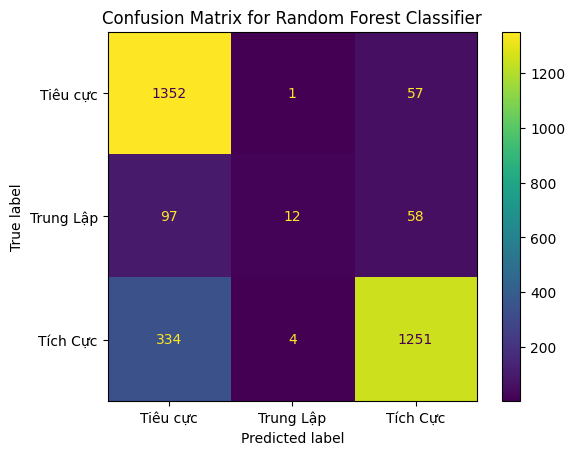

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_RF_phrase, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for Random Forest Classifier")

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF_phrase, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.76      0.96      0.85      1410
   Trung Lập       0.71      0.07      0.13       167
    Tích Cực       0.92      0.79      0.85      1589

    accuracy                           0.83      3166
   macro avg       0.79      0.61      0.61      3166
weighted avg       0.83      0.83      0.81      3166



In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_jobs=-1)
KNC.fit(X_train_val_dense, y_train_val)
y_pred_KNN = KNC.predict(X_test_dense)
print(f'Accuracy on test set: {KNC.score(X_test_dense, y_test)}')


Accuracy on test set: 0.8278584965255843


Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors Classifier')

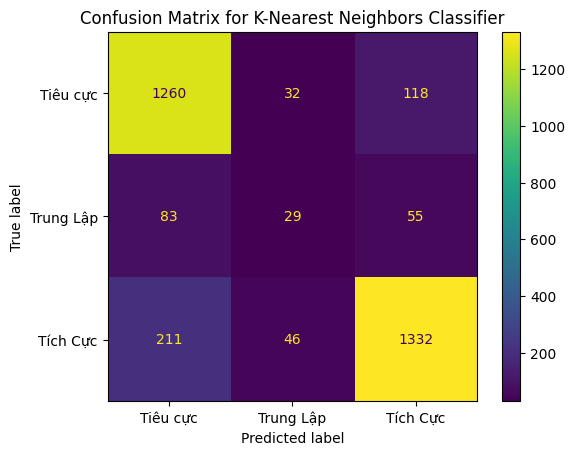

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_KNN, labels=KNC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.81      0.89      0.85      1410
   Trung Lập       0.27      0.17      0.21       167
    Tích Cực       0.89      0.84      0.86      1589

    accuracy                           0.83      3166
   macro avg       0.66      0.64      0.64      3166
weighted avg       0.82      0.83      0.82      3166



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
GNB = GaussianNB(var_smoothing=1e-7)
GNB.fit(X_train_val_dense, y_train_val)
y_pred_GNB = GNB.predict(X_test_dense)
print(f'Accuracy on test set: {GNB.score(X_test_dense, y_test)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB, target_names=label_name))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_GNB, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Gaussian Naive Bayes')


Accuracy on test set: 0.5476942514213519


Accuracy on test set: 0.7706885660138977
              precision    recall  f1-score   support

    Tiêu cực       0.74      0.85      0.79      1410
   Trung Lập       0.34      0.29      0.31       167
    Tích Cực       0.85      0.75      0.79      1589

    accuracy                           0.77      3166
   macro avg       0.64      0.63      0.63      3166
weighted avg       0.77      0.77      0.77      3166



Text(0.5, 1.0, 'Confusion Matrix for Gaussian Naive Bayes')

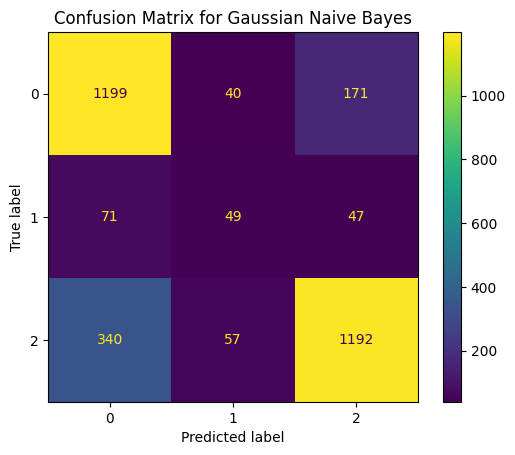

In [ ]:
from sklearn.naive_bayes import  BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train_val_dense, y_train_val)
y_pred_BNB = BNB.predict(X_test_dense)
print(f'Accuracy on test set: {BNB.score(X_test_dense, y_test)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_BNB, target_names=label_name))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_BNB, labels=BNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=BNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Bernouli Naive Bayes')


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.73      0.31      0.44      1410
   Trung Lập       0.12      0.48      0.19       167
    Tích Cực       0.65      0.77      0.70      1589

    accuracy                           0.55      3166
   macro avg       0.50      0.52      0.44      3166
weighted avg       0.66      0.55      0.56      3166



In [65]:
!pip install xgboost

In [66]:
from sklearn.svm import SVC
# Khởi tạo mô hình với các tham số cụ thể
svc = SVC(
    class_weight='balanced',
)

# Huấn luyện mô hình
svc.fit(X_train_val_dense, y_train_val)

# Dự đoán và đánh giá
y_pred_SVC = svc.predict(X_test_dense)
accuracy = svc.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


Accuracy on test set: 0.81


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVC, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.87      0.86      0.86      1410
   Trung Lập       0.24      0.61      0.35       167
    Tích Cực       0.94      0.80      0.86      1589

    accuracy                           0.81      3166
   macro avg       0.68      0.76      0.69      3166
weighted avg       0.87      0.81      0.84      3166



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

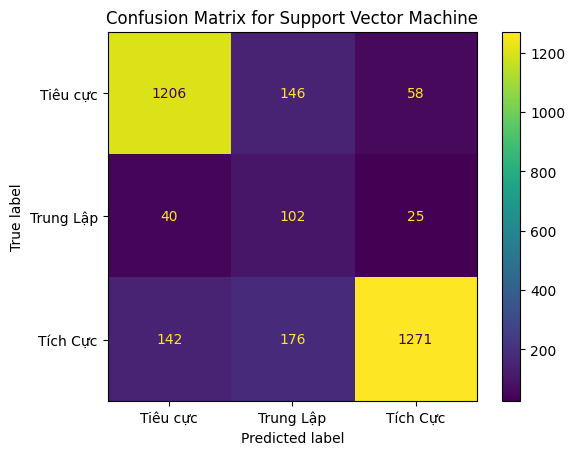

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_SVC, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Support Vector Machine')

In [69]:
from sklearn.linear_model import SGDClassifier
sgdClassifier = SGDClassifier(max_iter=10000, tol=1e-6)
sgdClassifier.fit(X_train_val_dense, y_train_val)

y_pred_sgd = sgdClassifier.predict(X_test_dense)
accuracy = sgdClassifier.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd, target_names=label_name))

Accuracy on test set: 0.87
              precision    recall  f1-score   support

    Tiêu cực       0.86      0.91      0.89      1410
   Trung Lập       0.51      0.23      0.31       167
    Tích Cực       0.89      0.90      0.90      1589

    accuracy                           0.87      3166
   macro avg       0.75      0.68      0.70      3166
weighted avg       0.86      0.87      0.86      3166



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

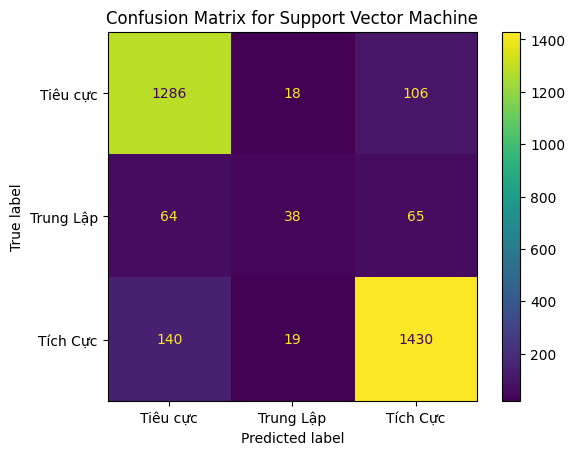

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_sgd, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Linear Support Vector Machine')

In [71]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
print(len(y_train_val))

logistic_regression = LogisticRegression(
    max_iter=100000,
    tol=1e-7,
    random_state=2004,
    warm_start=True
)

# Huấn luyện mô hình
logistic_regression.fit(X_train_val_dense, y_train_val)

# Dự đoán
y_pred_logistic_regression = logistic_regression.predict(X_test_dense)

# Đánh giá mô hình
accuracy = logistic_regression.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy}')


13006
Accuracy on test set: 0.8843967150979154


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

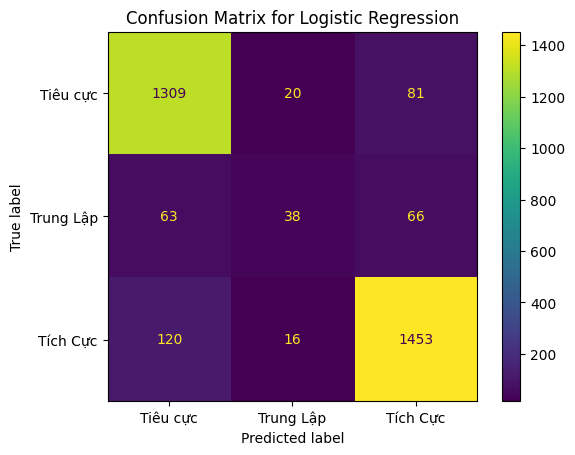

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_logistic_regression, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Logistic Regression')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.88      0.93      0.90      1410
   Trung Lập       0.51      0.23      0.32       167
    Tích Cực       0.91      0.91      0.91      1589

    accuracy                           0.88      3166
   macro avg       0.77      0.69      0.71      3166
weighted avg       0.87      0.88      0.88      3166



              precision    recall  f1-score   support

    Tiêu cực       0.88      0.93      0.90      1410
   Trung Lập       0.51      0.23      0.32       167
    Tích Cực       0.91      0.91      0.91      1589

    accuracy                           0.88      3166
   macro avg       0.77      0.69      0.71      3166
weighted avg       0.87      0.88      0.88      3166



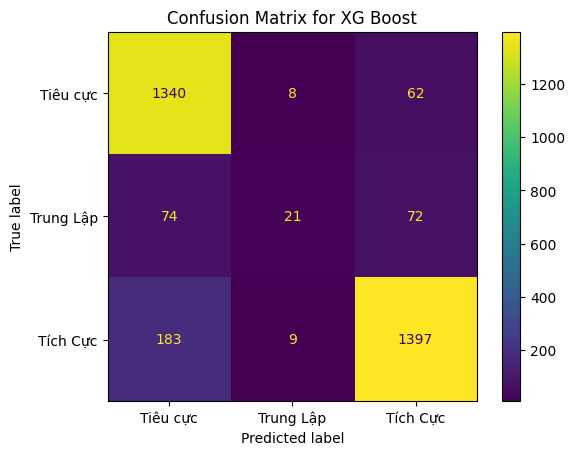

In [74]:
from xgboost import XGBClassifier

# XGB cho bài toán phân loại
xgb = XGBClassifier()
xgb.fit(X_train_val_dense, y_train_val)
y_pred_xgb = xgb.predict(X_test_dense)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for XG Boost')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.88      0.93      0.90      1410
   Trung Lập       0.51      0.23      0.32       167
    Tích Cực       0.91      0.91      0.91      1589

    accuracy                           0.88      3166
   macro avg       0.77      0.69      0.71      3166
weighted avg       0.87      0.88      0.88      3166



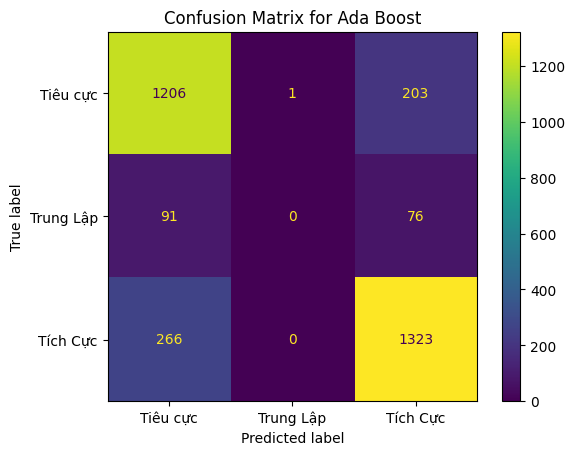

In [75]:
from sklearn.ensemble import AdaBoostClassifier
# XGB cho bài toán phân loại
ada = AdaBoostClassifier()
ada.fit(X_train_val_dense, y_train_val)
y_pred_ada = ada.predict(X_test_dense)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ada, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Ada Boost')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))